In [1]:
# TASK 1 : Movie Ratings Prediction
# Bactch : Aug 
# Domain : Data Science 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [3]:
import os 
os.chdir("C:\\Users\\Admin\\OneDrive\\Documents\\dataset")

In [4]:
df = pd.read_csv("movies.csv")
df.head()


,Poster_Link,Movies,Year,Certificate,Duration,Genre,Rating,Overview,Meta_score,Director,Actor 1,Actor 2,Actor 3,Actor 4,votes
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845


In [5]:
# Check columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Poster_Link  1000 non-null   object 
 1   Movies       1000 non-null   object 
 2   Year         1000 non-null   object 
 3   Certificate  899 non-null    object 
 4   Duration     1000 non-null   object 
 5   Genre        1000 non-null   object 
 6   Rating       1000 non-null   float64
 7   Overview     1000 non-null   object 
 8   Meta_score   843 non-null    float64
 9   Director     1000 non-null   object 
 10  Actor 1      1000 non-null   object 
 11  Actor 2      1000 non-null   object 
 12  Actor 3      1000 non-null   object 
 13  Actor 4      1000 non-null   object 
 14  votes        1000 non-null   int64  
dtypes: float64(2), int64(1), object(12)
memory usage: 117.3+ KB


,Rating,Meta_score,votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [6]:
df.shape

(1000, 15)

In [7]:
# Missing values
print(df.isnull().sum())

Poster_Link      0
Movies           0
Year             0
Certificate    101
Duration         0
Genre            0
Rating           0
Overview         0
Meta_score     157
Director         0
Actor 1          0
Actor 2          0
Actor 3          0
Actor 4          0
votes            0
dtype: int64


In [8]:
#Fix Duration: remove " min" and convert to int
df['Duration'] = df['Duration'].str.replace(' min', '').astype(int)

# Handle Certificate (categorical with missing values)
df['Certificate'] = df['Certificate'].fillna("Unknown")

# Handle Meta_score (fill missing with median)
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())


In [9]:
print(df.isnull().sum())

Poster_Link    0
Movies         0
Year           0
Certificate    0
Duration       0
Genre          0
Rating         0
Overview       0
Meta_score     0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
Actor 4        0
votes          0
dtype: int64


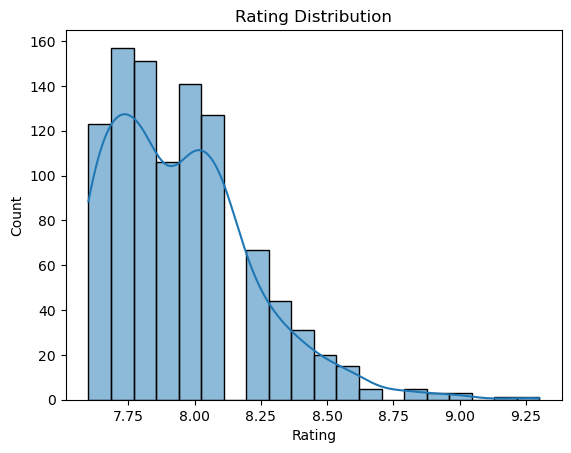

In [10]:
# Distribution of ratings
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Rating Distribution")
plt.show()

In [11]:
# Ensure all values are treated as string, then remove 'min'
df['Duration'] = df['Duration'].astype(str).str.replace('min', '').str.strip()
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')

df['Meta_score'] = pd.to_numeric(df['Meta_score'], errors='coerce').astype('Int64')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Poster_Link  1000 non-null   object 
 1   Movies       1000 non-null   object 
 2   Year         999 non-null    Int64  
 3   Certificate  1000 non-null   object 
 4   Duration     1000 non-null   int64  
 5   Genre        1000 non-null   object 
 6   Rating       1000 non-null   float64
 7   Overview     1000 non-null   object 
 8   Meta_score   1000 non-null   Int64  
 9   Director     1000 non-null   object 
 10  Actor 1      1000 non-null   object 
 11  Actor 2      1000 non-null   object 
 12  Actor 3      1000 non-null   object 
 13  Actor 4      1000 non-null   object 
 14  votes        1000 non-null   int64  
dtypes: Int64(2), float64(1), int64(2), object(10)
memory usage: 119.3+ KB


In [14]:
print(df[categorical_cols + numeric_cols].head(20))
print(df[categorical_cols + numeric_cols].nunique())

   Certificate                       Genre              Director  \
0            A                       Drama        Frank Darabont   
1            A                Crime, Drama  Francis Ford Coppola   
2           UA        Action, Crime, Drama     Christopher Nolan   
3            A                Crime, Drama  Francis Ford Coppola   
4            U                Crime, Drama          Sidney Lumet   
5            U    Action, Adventure, Drama         Peter Jackson   
6            A                Crime, Drama     Quentin Tarantino   
7            A   Biography, Drama, History      Steven Spielberg   
8           UA   Action, Adventure, Sci-Fi     Christopher Nolan   
9            A                       Drama         David Fincher   
10           U    Action, Adventure, Drama         Peter Jackson   
11          UA              Drama, Romance       Robert Zemeckis   
12           A                     Western          Sergio Leone   
13          UA    Action, Adventure, Drama      

In [16]:
print(df['Duration'].unique()[:20])
print(df['Meta_score'].unique()[:20])
print(df['votes'].unique()[:20])

[142 175 152 202  96 201 154 195 148 139 178 161 179 136 146 124 133 160
 132 153]
<IntegerArray>
[80, 100, 84, 90, 96, 94, 74, 66, 92, 82, 87, 73, 83, 79, 91, 61, 59, 65, 85,
 98]
Length: 20, dtype: Int64
[2343110 1620367 2303232 1129952  689845 1642758 1826188 1213505 2067042
 1854740 1661481 1809221  688390 1485555 1676426 1020727 1159315  918088
   55291  552778]


In [18]:
print(df[numeric_cols].isnull().sum())

Year          1
Duration      0
Meta_score    0
votes         0
dtype: int64


In [24]:
df['Year'] = df['Year'].fillna(df['Year'].median())
print(df[numeric_cols].isnull().sum())

Year          0
Duration      0
Meta_score    0
votes         0
dtype: int64


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Define columns
categorical_cols = ['Certificate', 'Genre', 'Director', 'Actor 1']
numeric_cols = ['Year', 'Duration', 'Meta_score', 'votes']

# Features & target
X = df[categorical_cols + numeric_cols]
y = df['Rating']   # target column

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('numeric', StandardScaler(), numeric_cols)
    ]
)

# Pipeline (preprocessing + model)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Absolute Error: 0.15643999999999958
Root Mean Squared Error: 0.2023656097265536
R² Score: 0.36116560589043145


In [ ]:
############ Improving ############

In [37]:
import pandas as pd
import numpy as np

df2 = df.copy()

# ✅ Convert Duration "142 min" → 142
df2['Duration'] = (
    df2['Duration']
    .astype(str)                         # force to string
    .str.replace(' min', '', regex=False)
    .replace('nan', np.nan)              # turn 'nan' back to real NaN
    .astype(float)
)

# ✅ Extract decade from Year (float → int → decade)
df2['Decade'] = (df2['Year'].fillna(0).astype(int) // 10) * 10

# ✅ Combine actors into one string
df2['All_Actors'] = (
    df2[['Actor 1', 'Actor 2', 'Actor 3', 'Actor 4']]
    .fillna('')
    .astype(str)
    .agg(' '.join, axis=1)
)

# ✅ Ensure Genre is string, then one-hot encode
df2 = df2.join(df2['Genre'].fillna('').astype(str).str.get_dummies(sep=','))

# ✅ Drop unused cols
df2 = df2.drop(['Poster_Link', 'Movies', 'Overview', 'Actor 1', 'Actor 2', 'Actor 3', 'Actor 4'], axis=1)

In [39]:
# Target
y = df2['Rating']

# Features
X = df2.drop(['Rating'], axis=1)

categorical_cols = ['Certificate', 'Director', 'All_Actors']
numeric_cols = ['Year', 'Duration', 'Meta_score', 'votes', 'Decade'] + list(df2['Genre'].str.get_dummies(sep=',').columns)

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(handle_unknown='ignore', max_categories=50), categorical_cols),
        ('numeric', StandardScaler(), numeric_cols)
    ]
)

# XGBoost regressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Full pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb)
])

In [43]:
# Define parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [4, 6, 8],
    'regressor__learning_rate': [0.05, 0.1, 0.2],
    'regressor__subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Params:", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Params: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 4, 'regressor__n_estimators': 100, 'regressor__subsample': 0.8}


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Improved MAE:", mae)
print("Improved RMSE:", rmse)
print("Improved R²:", r2)

Improved MAE: 0.15876643037796023
Improved RMSE: 0.1999539756614314
Improved R²: 0.3763011296828235
